# Assignment 1

You only need to write one line of code for each question. When answering questions that ask you to identify or interpret something, the length of your response doesn’t matter. For example, if the answer is just ‘yes,’ ‘no,’ or a number, you can just give that answer without adding anything else.

We will go through comparable code and concepts in the live learning session. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that **no outside searches are required by the assignment!**). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

### Classification using KNN

Let's set up our workspace and use the **Wine dataset** from `scikit-learn`. This dataset contains 178 wine samples with 13 chemical features, used to classify wines into different classes based on their origin.

The **response variable** is `class`, which indicates the type of wine. We'll use all of the chemical features to predict this response variable.

In [3]:
# Import standard libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, precision_score
from sklearn.model_selection import cross_validate, cross_val_score, LeaveOneOut
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [4]:
from sklearn.datasets import load_wine

# Load the Wine dataset
wine_data = load_wine()

# Convert to DataFrame
wine_df = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)

# Bind the 'class' (wine target) to the DataFrame
wine_df['class'] = wine_data.target

# Display the DataFrame
wine_df


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


#### **Question 1:** 
#### Data inspection

Before fitting any model, it is essential to understand our data. **Use Python code** to answer the following questions about the **Wine dataset**:

_(i)_ How many observations (rows) does the dataset contain?

In [5]:
wine_df.shape[0]

178

_(ii)_ How many variables (columns) does the dataset contain?

In [6]:
wine_df.shape[1]

14

_(iii)_ What is the 'variable type' of the response variable `class` (e.g., 'integer', 'category', etc.)? What are the 'levels' (unique values) of the variable?

In [7]:
print(f'The variable type of the response variable class is {wine_df["class"].dtype}, which is a subtype of integer')
print(f'The \'levels\' of variable class are {[level for level in wine_df["class"].unique()]}')

The variable type of the response variable class is int32, which is a subtype of integer
The 'levels' of variable class are [0, 1, 2]



_(iv)_ How many predictor variables do we have (Hint: all variables other than `class`)? 

In [8]:
print(f'The Wine dataset contains {wine_df.shape[1]-1} predictor variables')

The Wine dataset contains 13 predictor variables


You can use `print()` and `describe()` to help answer these questions.

#### **Question 2:** 
#### Standardization and data-splitting

Next, we must preform 'pre-processing' or 'data munging', to prepare our data for classification/prediction. For KNN, there are three essential steps. A first essential step is to 'standardize' the predictor variables. We can achieve this using the scaler method, provided as follows:

In [9]:
# Select predictors (excluding the last column)
predictors = wine_df.iloc[:, :-1]

# Standardize the predictors
scaler = StandardScaler()
predictors_standardized = pd.DataFrame(scaler.fit_transform(predictors), columns=predictors.columns)

# Display the head of the standardized predictors
print(predictors_standardized.head())

    alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0  1.518613   -0.562250  0.232053          -1.169593   1.913905   
1  0.246290   -0.499413 -0.827996          -2.490847   0.018145   
2  0.196879    0.021231  1.109334          -0.268738   0.088358   
3  1.691550   -0.346811  0.487926          -0.809251   0.930918   
4  0.295700    0.227694  1.840403           0.451946   1.281985   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0       0.808997    1.034819             -0.659563         1.224884   
1       0.568648    0.733629             -0.820719        -0.544721   
2       0.808997    1.215533             -0.498407         2.135968   
3       2.491446    1.466525             -0.981875         1.032155   
4       0.808997    0.663351              0.226796         0.401404   

   color_intensity       hue  od280/od315_of_diluted_wines   proline  
0         0.251717  0.362177                      1.847920  1.013009  
1        -0.293321  0.406051

(i) Why is it important to standardize the predictor variables?

Because the scale of each variable affects predictions, with variables with larger scales dominating the prediction process. Through standardization, we level the field on that regard.

(ii) Why did we elect not to standard our response variable `Class`?

Because it is an actual Class or Label and the Labels will not change when we change the expression of all the features. In this case, the Class data type is to be categorical.

(iii) A second essential step is to set a random seed. Do so below (Hint: use the random.seed function). Why is setting a seed important? Is the particular seed value important? Why or why not?

Setting a seed value guarantees the same results each time the analysis is run, in this case the outcome of the suffle process embedded inside train_test_split.

The particular seed value is not important, as long as it is always the same value.

It is not important because the value in the function seed is not mathematically related to the outcome, it just differenciates between outcomes.

(iv) A third essential step is to split our standardized data into separate training and testing sets. We will split into 75% training and 25% testing. The provided code randomly partitions our data, and creates linked training sets for the predictors and response variables. 

Extend the code to create a non-overlapping test set for the predictors and response variables.

In [10]:
# set a seed for reproducibility
#np.random.seed(123)

# change the response variable data type to categorical and assign it to a new variable for better readability
wine_df['class'] = wine_df['class'].astype('category')
response_var = wine_df['class'] 

# split the data into a training and testing set. hint: use train_test_split !
predictors_standardized_train, predictors_standardized_test, response_var_train, response_var_test = train_test_split(
    predictors_standardized, response_var, train_size=0.75, stratify = response_var, random_state = 123  # supersedes the np.random.seed(123)
)


In [11]:
# Assess the train/test split. UNCOMMENT AS NEEDED BEFORE RUNNING THE CODE
#print(f'Before the split, let\'s remind that the predictor variable shape is {predictors_standardized.shape} and the response variable shape is {response_var.shape}')
#predictors_standardized_train.info()
#print(f'Train predictor data set contains {int(round(predictors_standardized_train.shape[0]/predictors_standardized.shape[0]*100,0))} % of the data rows and {predictors_standardized_train.shape[1]} columns')
#print(f'Train response data set contains {int(round(response_var_train.shape[0]/response_var.shape[0]*100,0))} % of the data rows and 1 column')
#predictors_standardized_test.info()
#print(f'Test predictor data set contains {int(round(predictors_standardized_test.shape[0]/predictors_standardized.shape[0]*100,0))} % of the data rows and {predictors_standardized_test.shape[1]} columns')
#print(f'Test response data set contains {int(round(response_var_test.shape[0]/response_var.shape[0]*100,0))} % of the data rows and 1 column')
#response_var_train.value_counts(normalize=True)
#response_var_test.value_counts(normalize=True)

#### **Question 3:**
#### Model initialization and cross-validation
We are finally set to fit the KNN model. 


Perform a grid search to tune the `n_neighbors` hyperparameter using 10-fold cross-validation. Follow these steps:

1. Initialize the KNN classifier using `KNeighborsClassifier()`.
2. Define a parameter grid for `n_neighbors` ranging from 1 to 50.
3. Implement a grid search using `GridSearchCV` with 10-fold cross-validation to find the optimal number of neighbors.
4. After fitting the model on the training data, identify and return the best value for `n_neighbors` based on the grid search results.

In [12]:
# GRID SEARCH CV WITH MAX NUMBER OF FOLDS CV = 36
# initialize the KNN classifier, n_neighbors is not relevant because it will iterate later through the grid search
knn = KNeighborsClassifier(n_neighbors=1)
# predictor - X, response - y
X_train = predictors_standardized_train
y_train = response_var_train
# define parameter grid for `n_neighbors` ranging from 1 to 50
parameter_grid = {
    "n_neighbors": range(1, 129, 1),
}
# implement a grid search using `GridSearchCV` with 10-fold cross-validation to find the optimal number of neighbors
# even if it doesn't ask for, use of scoring='accuracy' because it is the output required later
wine_tune_grid = GridSearchCV(
    estimator=knn,
    param_grid=parameter_grid,
    cv=36,
    scoring='accuracy'
)
# fit the model on the training data
wine_tune_grid.fit(X_train, y_train)
# identify and return the best value for `n_neighbors` based on the grid search results
print(f'Best parameter {wine_tune_grid.best_params_} \nBest estimator {wine_tune_grid.best_estimator_}')

Best parameter {'n_neighbors': 23} 
Best estimator KNeighborsClassifier(n_neighbors=23)


The best value for `n_neighbors` is 7

The following code in question 3 has been used to confirm this result but has not been necessary to obtain it. To run it, please remove the triple quotes '''  '''

In [13]:
# Confirm the best accuracy from the grid search in a table. CONFIRMED. UNCOMMENT IF NEED TO RUN THE CODE 
# value of accuracies for 'n_neighbors'
accuracies_grid = pd.DataFrame(wine_tune_grid.cv_results_)
accuracies_grid['n_neighbors'] = accuracies_grid.index + 1
accuracies_grid['std_error'] = accuracies_grid['std_test_score'] / np.sqrt(10)
accuracies_grid.sort_values(by = ['mean_test_score'], ascending = False, inplace = True)
accuracies_grid[['n_neighbors', 'mean_test_score', 'std_error']].head(10)

,n_neighbors,mean_test_score,std_error
40,41,0.972222,0.024845
23,24,0.972222,0.024845
22,23,0.972222,0.024845
6,7,0.969907,0.027183
8,9,0.969907,0.027183
15,16,0.969907,0.027183
4,5,0.969907,0.027183
12,13,0.969907,0.027183
38,39,0.965278,0.027340
27,28,0.965278,0.033086


The table output from the code just above shows that the accuracy and associated standard error is exactly the same for n_neighbors k = 7 than for k = 13.

The plot output from code just below also shows that both k values have the same accuracy. Additionally, it shows that the sensitivity is similar, meaning the accuracy for k values beside themselves.

Under similar conditions, we will pick the simpler model, which in this case is the k value with lower computational cost, which is k = 7.

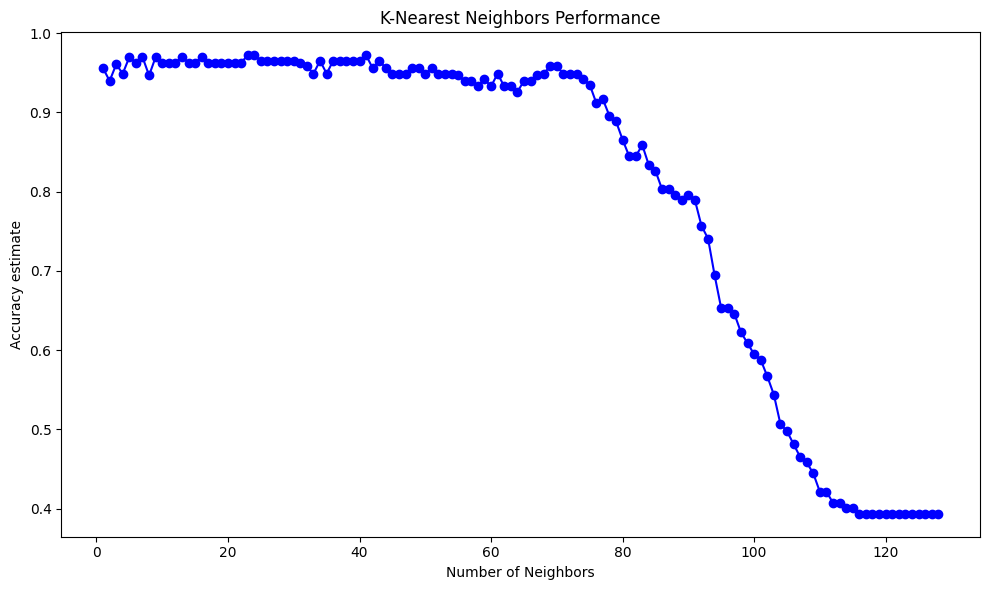

In [14]:
# Confirm the best accuracy from the grid search in a plot. CONFIRMED. UNCOMMENT IF NEED TO RUN THE CODE 

# value of accuracies for 'n_neighbors'
accuracies_grid = pd.DataFrame(wine_tune_grid.cv_results_)
# Create the plot
plt.figure(figsize=(10, 6))
# Plot mean test scores with error bars
plt.plot(accuracies_grid['param_n_neighbors'], accuracies_grid['mean_test_score'], '-o', color='blue')
# Add labels and legend
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy estimate')
plt.title('K-Nearest Neighbors Performance')
plt.tight_layout()
plt.show()


In [15]:
# Confirm the accuracy obtained from the grid search with best_params_. CONFIRMED 

knn = KNeighborsClassifier(n_neighbors=23)
returned_dictionary = cross_validate(
    estimator=knn,
    cv=36,    # setting up the cross validation number
    X=X_train,
    y=y_train
)
cv_10_df = pd.DataFrame(returned_dictionary)    # convert it to pandas DataFrame
cv_10_metrics = cv_10_df.agg(["mean", "sem"])   # obtain the mean and standard error of the mean
cv_10_metrics                                   
# obtained same accuracy value (0.977473) and similar standard error (0.011480) of the mean than ones from the grid search shown above in a table


,fit_time,score_time,test_score
mean,0.004375,0.005963,0.972222
sem,0.000257,0.000272,0.013280


In [16]:
# ACCURACY_SCORE ON ITSELF
# best value for `n_neighbors` is 23
knn = KNeighborsClassifier(n_neighbors=23)
# fit the model on the training data
knn.fit(X_train, y_train)
# predict the class labels for the train data (itself)
y_pred = knn.predict(X_train)
# obtain the accuracy score
accuracy_score(y_train, y_pred)  # 0.96992  same result as knn.score
# It returns artificially high accuracy because each point is compared also to itself. NOT GOOD PRACTICE

0.9699248120300752

In [17]:
# SCORE ON ITSELF
# best value for `n_neighbors` is 23
knn = KNeighborsClassifier(n_neighbors=23)
# fit the model on the training data
knn.fit(X_train, y_train)
# obtain the score
knn.score(X_train, y_train) # 0.96992  same result as accuracy_score
# It returns artificially high accuracy because each point is compared also to itself. NOT GOOD PRACTICE

0.9699248120300752

In [18]:
# SCORE LEAVE-ONE-OUT
# best value for `n_neighbors` is 23
knn = KNeighborsClassifier(n_neighbors=23)
# fit the model on the training data
knn.fit(X_train, y_train)
# obtain the score
knn.score(None, y_train) # If None, predictions for all indexed points are used; in this case, points are not considered their own neighbors
# implicitly performs a leave-one-out cross-validation procedure
# is equivalent to cross_val_score(knn, X, y, cv=LeaveOneOut()) but typically much faster
# 0.96992  same result as accuracy_score on itself and score on itself

0.9699248120300752

In [19]:
# CROSS_VAL_SCORE LEAVE-ONE-OUT
# best value for `n_neighbors` is 23
knn = KNeighborsClassifier(n_neighbors=23)
# fit the model on the training data and obtain the score
cross_val_score(knn, X_train, y_train, cv=LeaveOneOut()).mean()
# 0.96992  same result as accuracy_score on itself and score on itself


0.9699248120300752

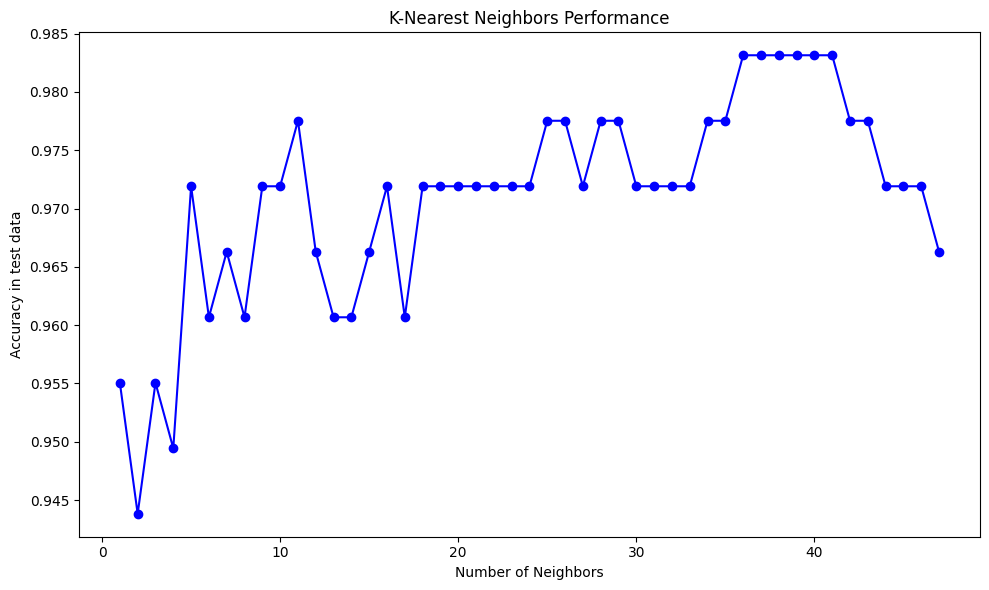

In [27]:
# Loop for the best K with SCORE LEAVE-ONE-OUT through the WHOLE DATASET
X = predictors_standardized
y = response_var
score_list = []
for k in range(1, 178, 1):
    knn = KNeighborsClassifier(n_neighbors=k)
    # fit the model on the training data
    knn.fit(X, y)
    # obtain the score
    score_list.append(knn.score(None, y)) 

# Create the plot
plt.figure(figsize=(10, 6))
# Plot mean test accuracies
plt.plot(range(1, 48, 1), score_list[:47], '-o', color='blue')
# Add labels and legend
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy in test data')
plt.title('K-Nearest Neighbors Performance')
plt.tight_layout()
plt.show()

#### **Question 4:**
#### Model evaluation

Using the best value for `n_neighbors`, fit a KNN model on the training data and evaluate its performance on the test set using `accuracy_score`.

In [21]:
# best value for `n_neighbors` is 23
knn = KNeighborsClassifier(n_neighbors=23)
# fit the model on the training data
knn.fit(X_train, y_train)
# bring the test data
X_test = predictors_standardized_test
y_true = response_var_test
# predict the class labels for the test data
y_pred = knn.predict(X_test)
# obtain the accuracy score
accuracy_score(y_true, y_pred)

0.9777777777777777

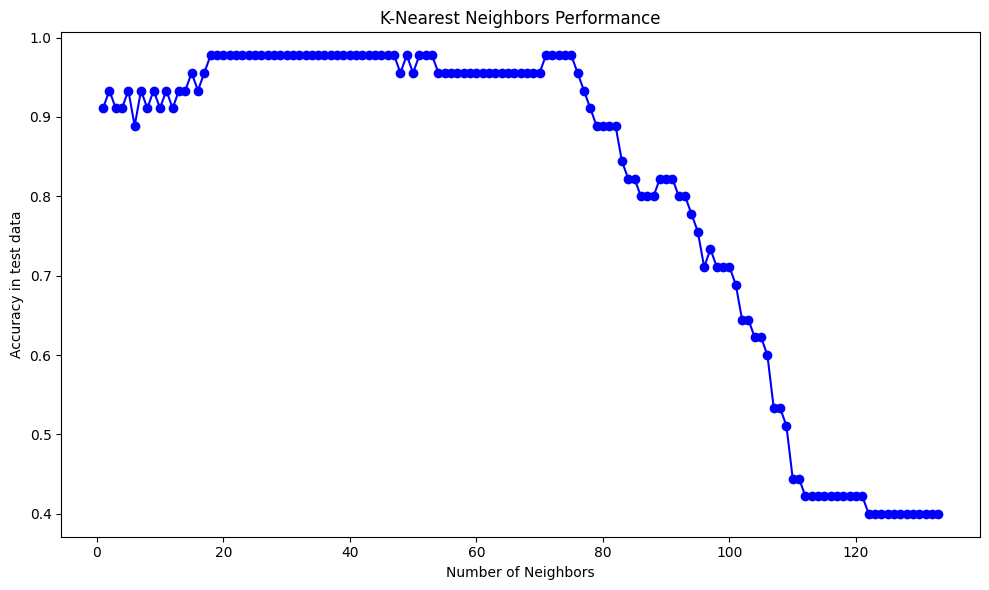

In [22]:
# bring the test data
X_test = predictors_standardized_test
y_true = response_var_test
# prepare the loop
accuracy_score_list = []
for k in range(1, 134, 1):
    knn = KNeighborsClassifier(n_neighbors=k)
    # fit the model on the training data
    knn.fit(X_train, y_train)
    # predict the class labels for the test data
    y_pred = knn.predict(X_test)
    # obtain the accuracy score
    accuracy_score_list.append(accuracy_score(y_true, y_pred))
# Create the plot
plt.figure(figsize=(10, 6))
# Plot mean test accuracies
plt.plot(range(1, 134, 1), accuracy_score_list, '-o', color='blue')
# Add labels and legend
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy in test data')
plt.title('K-Nearest Neighbors Performance')
plt.tight_layout()
plt.show()

Performance on the test: the accuracy of the model in the test data is 97.22%

In order to further evaluate its performance, precision and recall have been calculated for each label:

In [23]:
# Precision of each class
precision_score(y_true, y_pred, average = None)   # array([0.88, 1.00, 0.92])

c:\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


array([0. , 0.4, 0. ])

In [24]:
# Recall of each class
recall_score(y_true, y_pred, average = None)       # array([1.00, 0.83, 1.00])

array([0., 1., 0.])

Class 0: with a recall of 100% and a precision of 88%, the model detects all class 0 wines at the cost of being mistaken in 12% of the cases, where some class 1 wines are labelled as class 0.

Class 1: with a precision of 100%, the model is never wrong when labels a wine as class 1 but with a recall of 83% it misses 17% of them, labelling them sometimes as class 0 or 2. 

Class 2: with a recall of 100% and a precision of 92%, the model detects all class 2 wines at the cost of being mistaken in 8% of the cases, where some class 1 wines are labelled as class 2.